In [1]:
import numpy as np
from scipy.stats import norm
import numpy as np
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from scipy import stats
import pandas as pd

# Question 1

## Simulating Stock Price

#### SX5E

In [2]:
npr.seed(123)
S0_SX5E = 4235
sigma = 0.15 # vola
r = 0.03 # rfr
q = 0.02 # div
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_SX5E = np.zeros((n_scenarios, time_steps+1))
S_SX5E[:,0] = S0_SX5E
Z_SX5E = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios ):
    for t in range(1, time_steps+1):
        Z_SX5E[s,t-1] = npr.standard_normal()
        S_SX5E[s,t] = S_SX5E[s,t-1] * np.exp((r-q-0.5 * sigma ** 2) * delta + sigma * np.sqrt(delta) * Z_SX5E[s,t-1])

#### AEX

In [3]:
npr.seed(456)
S0_AEX = 770
sigma = 0.15 # vola
r = 0.03 # rfr
q = 0.02 # div
rho = 0.8
n_scenarios = 10000
time_yrs = 5 # maturity in years
time_steps = 60 # monthly 
delta = time_yrs / time_steps
S_AEX = np.zeros((n_scenarios, time_steps + 1))
S_AEX[:,0] = S0_AEX
Z_AEX = np.zeros((n_scenarios, time_steps))
for s in range(0, n_scenarios):
    for t in range(1, time_steps+1):
        Z_AEX[s,t-1] = npr.standard_normal()
        S_AEX[s,t] = S_AEX[s,t-1] * np.exp((r-q-0.5 * sigma ** 2) * delta + 
                                           sigma * np.sqrt(delta) * (rho*Z_SX5E[s,t-1]+np.sqrt(1-rho ** 2)*Z_AEX[s,t-1]))

## Verifying

### 1b

#### SX5E

In [56]:
# Simulation
X_SX5E_put = 3388 # strike price
n_contracts_SX5E = 10000
final_prices_SX5E = S_SX5E[:, time_steps]
put_value_SX5E= np.array((X_SX5E_put - final_prices_SX5E)*n_contracts_SX5E)
put_value_SX5E[put_value_SX5E < 0] = 0
pv_put_SX5E = put_value_SX5E * np.exp(-r * time_yrs)
np.mean(pv_put_SX5E)

1328913.7846860227

In [5]:
# Black-Scholes
_norm_cdf = stats.norm(0, 1).cdf
_norm_pdf = stats.norm(0, 1).pdf

def d1(S, K, T, r, sigma, q):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def d2(S, K, T, r, sigma):
    return d1(S, K, T, r, sigma, q) - sigma * np.sqrt(T)

def put_value(S, K, T, r, sigma, q):
    return np.exp(-r * T) * K * _norm_cdf(-d2(S, K, T, r, sigma)) - np.exp(-q * T) * S  * _norm_cdf(
        -d1(S, K, T, r, sigma, q))

In [59]:
put_value_SX5E = put_value(S0_SX5E, X_SX5E_put, time_yrs, r, sigma, q) * n_contracts_SX5E
put_value_SX5E

1303097.5313947261

In [7]:
print("Black-Scholes result:", put_value_SX5E )
print("Simulated result:", np.mean(pv_put_SX5E))

Black-Scholes result: 1303097.5313947261
Simulated result: 1328913.7846860227


In [8]:
# Confidence interval
z_score = 1.96
mean_put_SX5E = np.mean(pv_put_SX5E, axis=0)
std_err_put_SX5E = np.std(pv_put_SX5E, axis=0) / np.sqrt(n_scenarios)
lower_bound_put_SX5E = mean_put_SX5E  - z_score * std_err_put_SX5E
upper_bound_put_SX5E = mean_put_SX5E  + z_score * std_err_put_SX5E
[lower_bound_put_SX5E, upper_bound_put_SX5E]

[1271773.5546726475, 1386054.0146993978]

#### AEX

In [57]:
# Simulation
X_AEX_put = 616 # strike price
n_contracts_AEX = 55000
final_prices_AEX = S_AEX[:, time_steps]
put_value_AEX = np.array((X_AEX_put - final_prices_AEX)*n_contracts_AEX)
put_value_AEX[put_value_AEX < 0] = 0
pv_put_AEX = put_value_AEX * np.exp(-r * time_yrs)
np.mean(pv_put_AEX)

1322582.891374328

In [58]:
put_value_AEX = put_value(S0_AEX, X_AEX_put, time_yrs, r, sigma, q) * n_contracts_AEX
put_value_AEX

1303097.531394727

In [60]:
# Confidence interval
z_score = 1.96
mean_put_AEX = np.mean(pv_put_AEX, axis=0)
std_err_put_AEX = np.std(pv_put_AEX, axis=0) / np.sqrt(n_scenarios)
lower_bound_put_AEX = mean_put_AEX  - z_score * std_err_put_AEX
upper_bound_put_AEX = mean_put_AEX  + z_score * std_err_put_AEX

In [61]:
[lower_bound_put_AEX, upper_bound_put_AEX]

[1265682.6663160417, 1379483.1164326142]

### 1a

#### SX5E

In [99]:
X_SX5E_fwd = 4235
X_AEX_fwd = 770

In [100]:
# Simulation
X_SX5E
fwd_sim_SX5E = n_contracts_SX5E * np.exp(-r*time_yrs) * (final_prices_SX5E - X_SX5E_fwd)
np.mean(fwd_sim_SX5E)

2024825.2863349358

In [101]:
# Theoretical value
F_SX5E = S0_SX5E * np.exp((r - q) * time_yrs)
fwd_theo_SX5E = n_contracts_SX5E * np.exp(-r*time_yrs) * (F_SX5E - X_SX5E_fwd)
fwd_theo_SX5E

1868881.852221689

In [102]:
print("Theoretical result:", fwd_theo_SX5E)
print("Simulated result:", np.mean(fwd_sim_SX5E))

Theoretical result: 1868881.852221689
Simulated result: 2024825.2863349358


In [103]:
# Confidence interval
z_score = 1.96
mean_fwd_SX5E = np.mean(fwd_sim_SX5E, axis=0)
std_err_fwd_SX5E = np.std(fwd_sim_SX5E, axis=0) / np.sqrt(n_scenarios)
lower_bound_fwd_SX5E = mean_fwd_SX5E - z_score * std_err_fwd_SX5E
upper_bound_fwd_SX5E = mean_fwd_SX5E + z_score * std_err_fwd_SX5E
[lower_bound_fwd_SX5E, upper_bound_fwd_SX5E]

[1759068.673014127, 2290581.8996557444]

#### AEX

In [104]:
# Simulation
fwd_sim_AEX = n_contracts_AEX * np.exp(-r*time_yrs) * (final_prices_AEX - X_AEX_fwd)
np.mean(fwd_sim_AEX)

1920160.6302630776

In [105]:
# Theoretical value
F_AEX = S0_AEX * np.exp((r - q) * time_yrs)
fwd_theo_AEX = n_contracts_AEX * np.exp(-r*time_yrs) * (F_AEX - X_AEX_fwd)
fwd_theo_AEX

1868881.8522216943

In [106]:
z_score = 1.96
mean_fwd_AEX = np.mean(fwd_sim_AEX, axis=0)  # Replace fwd_sim_SX5E with fwd_sim_AEX
std_err_fwd_AEX = np.std(fwd_sim_AEX, axis=0) / np.sqrt(n_scenarios)  # Replace fwd_sim_SX5E with fwd_sim_AEX
lower_bound_fwd_AEX = mean_fwd_AEX - z_score * std_err_fwd_AEX
upper_bound_fwd_AEX = mean_fwd_AEX + z_score * std_err_fwd_AEX
[lower_bound_fwd_AEX, upper_bound_fwd_AEX]

[1659041.3034682286, 2181279.957057927]

### 1c

In [23]:
SX5E = pd.DataFrame(S_SX5E)
ret_SX5E = np.log(SX5E.iloc[:, 1:] / (SX5E.iloc[:, :-1].values))
AEX = pd.DataFrame(S_AEX)
ret_AEX = np.log(AEX.iloc[:, 1:] / (AEX.iloc[:, :-1].values))
corr = np.corrcoef(ret_SX5E.iloc[0,:], ret_AEX.iloc[0,:])

In [147]:
corr

array([[1.        , 0.87954576],
       [0.87954576, 1.        ]])

In [142]:
correlations = []
for idx in range(len(ret_SX5E)):
    corr = np.corrcoef(ret_SX5E.iloc[idx,:], ret_AEX.iloc[idx,:])[0, 1]
    correlations.append(corr)

In [168]:
correlations

[0.8795457592882576,
 0.8217713193292546,
 0.7197575103000907,
 0.7701092568988621,
 0.8841168051412798,
 0.72894240260201,
 0.7854035885538253,
 0.7690294321941838,
 0.7995076899638233,
 0.837612879876117,
 0.7500279762785341,
 0.8521420748110468,
 0.8640549361073483,
 0.7754244479322828,
 0.833828216347169,
 0.8179943585269283,
 0.8037061378947155,
 0.7783628027198666,
 0.7165821294460262,
 0.8417431900737651,
 0.7018204336452438,
 0.859631071822107,
 0.7006420845887835,
 0.7281166037024983,
 0.8287809081651945,
 0.7861618450489585,
 0.8346496849874351,
 0.8827070019134869,
 0.8517666015762808,
 0.7735247774419923,
 0.8089651155485668,
 0.8034460831628751,
 0.8659365605617043,
 0.828846029008235,
 0.773298528839465,
 0.827905950522532,
 0.7925107963371975,
 0.840533115220443,
 0.7237832347499081,
 0.728004218412408,
 0.8025876447442364,
 0.7209052544827903,
 0.8615545201551159,
 0.8007629504178982,
 0.7967438792457789,
 0.7869049601200494,
 0.7955126716723732,
 0.7454336240102077,
 0

In [175]:
r = np.corrcoef(ret_SX5E.iloc[0,:], ret_AEX.iloc[0,:])[0,1]
z = 0.5 * np.log((1 + r) / (1 - r))
n = len(ret_SX5E.iloc[0,:])
SE = 1 / np.sqrt(n - 2)
z_crit = norm.ppf(0.975)
lower_bound = z - z_crit * SE
upper_bound = z + z_crit * SE
lower_bound_orig = (np.exp(2 * lower_bound) - 1) / (np.exp(2 * lower_bound) + 1)
upper_bound_orig = (np.exp(2 * upper_bound) - 1) / (np.exp(2 * upper_bound) + 1)
print("Confidence interval for Pearson's r:", (lower_bound_orig, upper_bound_orig))

Confidence interval for Pearson's r: (0.8063137239952731, 0.9262200079724727)


In [177]:

lower_bounds = []
upper_bounds = []


for idx in range(len(ret_SX5E)):
    # Calculate correlation coefficient
    r = np.corrcoef(ret_SX5E.iloc[idx,:], ret_AEX.iloc[idx,:])[0, 1]
    
    # Fisher's transformation
    z = 0.5 * np.log((1 + r) / (1 - r))
    
    # Compute standard error
    n = len(ret_SX5E.iloc[idx,:])  # Sample size
    SE = 1 / np.sqrt(n - 2)
    
    # Compute critical value for desired confidence level (e.g., 95% confidence interval)
    z_crit = norm.ppf(0.975)  # For a two-tailed test, 0.975 corresponds to 1 - alpha/2
    
    # Compute confidence interval
    lower_bound = z - z_crit * SE
    upper_bound = z + z_crit * SE
    
    # Transform back to the original scale
    lower_bound_orig = (np.exp(2 * lower_bound) - 1) / (np.exp(2 * lower_bound) + 1)
    upper_bound_orig = (np.exp(2 * upper_bound) - 1) / (np.exp(2 * upper_bound) + 1)
    

    lower_bounds.append(lower_bound_orig)
    upper_bounds.append(upper_bound_orig)

# Print confidence intervals for each row
for idx in range(len(lower_bounds)):
    print(f"Confidence interval for row {idx}: ({lower_bounds[idx]}, {upper_bounds[idx]})")


Confidence interval for row 0: (0.8063137239952731, 0.9262200079724727)
Confidence interval for row 1: (0.7186718601889476, 0.8895163750091686)
Confidence interval for row 2: (0.5715257355021948, 0.8225001970374128)
Confidence interval for row 3: (0.6429816082387496, 0.8559383206030723)
Confidence interval for row 4: (0.8133878895670921, 0.9290866667643227)
Confidence interval for row 5: (0.584394821896446, 0.8286532236195009)
Confidence interval for row 6: (0.6651335745950792, 0.8659549647936439)
Confidence interval for row 7: (0.6414256121119958, 0.8552286731675481)
Confidence interval for row 8: (0.6857509932718516, 0.8751351738922302)
Confidence interval for row 9: (0.7423813789344916, 0.8996681503835603)
Confidence interval for row 10: (0.6142157653942718, 0.8426880356262293)
Confidence interval for row 11: (0.764338471281622, 0.9089202923138022)
Confidence interval for row 12: (0.7824948716040554, 0.9164648756892347)
Confidence interval for row 13: (0.6506559715425475, 0.85942669

# Question 2

## 2a 

In [62]:
X_SX5E_fwd = 4235
X_AEX_fwd = 770

In [43]:
times = np.linspace(0, 5, int((5 - 0) * 12) + 1)
AEX.columns = times
SX5E.columns = times

In [46]:
eqf_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)
eqf_AEX = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)

In [65]:
# Calculate exposure for EQ forward contract

for i in range(eqf_SX5E.shape[0]):
    for j in range(eqf_SX5E.shape[1]):
        eqf_SX5E.iloc[i,j] = n_contracts_SX5E*np.exp(-r*(5-eqf_SX5E.columns[j]))*\
        (SX5E.iloc[i,j]*np.exp((r-q)*(5-eqf_SX5E.columns[j]))-X_SX5E_fwd)
        
for i in range(eqf_AEX.shape[0]):
    for j in range(eqf_AEX.shape[1]):
        eqf_AEX.iloc[i,j] = n_contracts_AEX*np.exp(-r*(5-eqf_AEX.columns[j]))*\
        (AEX.iloc[i,j]*np.exp((r-q)*(5-eqf_AEX.columns[j]))-X_AEX_fwd)

In [74]:
# Calculate exposure for put option contract

p_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)
p_AEX = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)

for i in range(p_SX5E.shape[0]):
    for j in range(p_SX5E.shape[1]):
        p_SX5E.iloc[i,j] = n_contracts_SX5E*np.exp(-r*p_SX5E.columns[j]) * \
        max(X_SX5E_put - SX5E.iloc[i,j],0)

for i in range(p_AEX.shape[0]):
    for j in range(p_AEX.shape[1]):
        p_AEX.iloc[i,j] = n_contracts_AEX * np.exp(-r*p_AEX.columns[j]) * \
        max(X_AEX_put - AEX.iloc[i,j],0)


In [79]:
# Netting all of the contracts
netting = eqf_SX5E + eqf_AEX + p_SX5E + p_AEX
positive_netting = np.maximum(netting, 0)

In [80]:
positive_netting

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,4.250000,4.333333,4.416667,4.500000,4.583333,4.666667,4.750000,4.833333,4.916667,5.000000
0,3737763.704443,0,2204323.647582,3587810.996195,0,0,5752158.527233,0,0,1196587.118217,...,4159043.999062,738012.18378,5021668.382455,1217830.781355,2699552.770809,6182610.66406,8473694.329033,14956875.081694,18910306.0579,25756320.639881
1,3737763.704443,924034.528492,3441807.290698,4056750.992746,17984.021806,3133253.892754,5211867.804546,5969429.666081,4545342.422225,736453.640257,...,0,0,0,1839357.379228,6401197.67718,5746072.192655,3073442.457075,5369518.745211,13240356.022797,4785201.26029
2,3737763.704443,2717057.863391,89625.163136,0,986471.929007,6976687.542793,5520088.181606,8299139.731309,9180463.219084,10469318.137671,...,7269569.96203,6441152.322692,5010392.939832,4359364.370921,3438927.143045,8105891.289591,9161117.957238,7304647.12097,5276463.129077,6506621.800555
3,3737763.704443,3631357.922024,8679549.216275,13259401.244254,10041552.221934,6332398.123006,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3737763.704443,5028213.653199,6468696.073757,6148279.396502,4651776.856987,6291951.437332,3936902.609746,5704818.402656,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3737763.704443,3620063.57781,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3737763.704443,4315113.968139,3355558.036233,938979.28456,4218083.773817,2192587.190632,5669818.361379,4373414.524688,4559215.080368,3355150.313436,...,2818185.333331,482576.004343,0,0,0,0,0,0,0,0
9997,3737763.704443,337213.027846,616516.541447,2670537.869349,6675215.284764,9314896.303691,2489706.668535,6540939.399718,6662847.842968,4470686.921371,...,0,0,0,0,0,0,0,0,0,0
9998,3737763.704443,4250989.362943,7186709.7536,7513705.480474,7781208.815721,13210253.108951,6879497.564602,10140619.503546,7516155.52584,13478765.918877,...,41059347.027017,40491355.743873,38414202.701427,37915470.073728,41420134.891894,49849442.952034,54017228.444331,55998625.836028,51620316.980814,57956632.155703


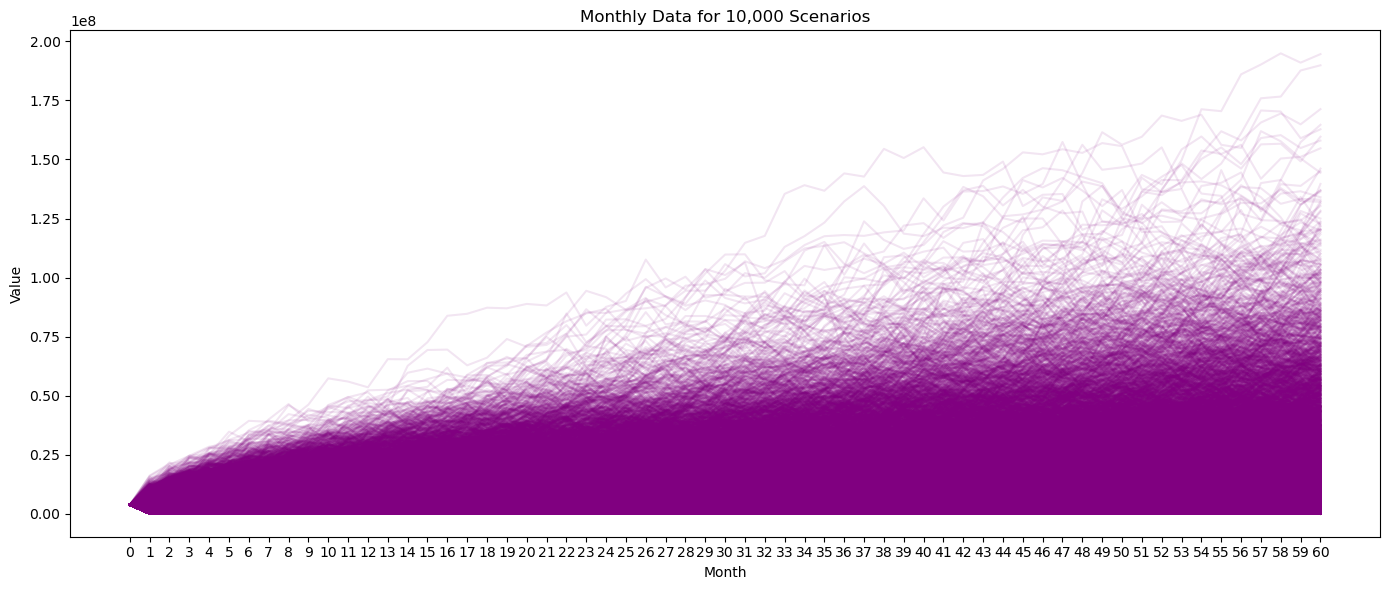

In [96]:
months = np.linspace(0, 60, 61)
plt.figure(figsize=(14, 6))
for i in range(positive_netting.shape[0]):
    plt.plot(months, positive_netting.iloc[i, :], color='purple', alpha=0.1)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Data for 10,000 Scenarios')
plt.xticks(months)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

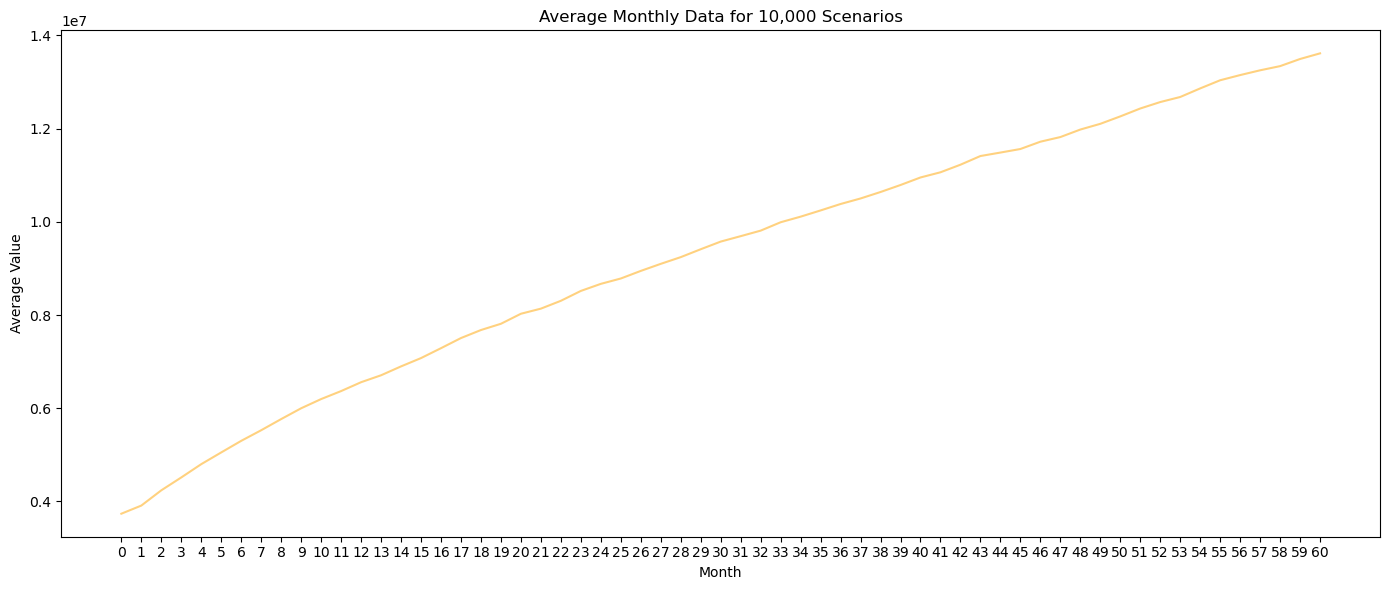

In [97]:
avg_positive_netting = positive_netting.mean()
months = np.linspace(0, 60, 61)

plt.figure(figsize=(14, 6))
plt.plot(months, avg_positive_netting, color='orange', alpha=0.5)  # Adjust alpha for transparency

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.title('Average Monthly Data for 10,000 Scenarios')

plt.xticks(months)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2b

#### Forward SX5E

In [233]:
index = ['T', 'Forward intensity', 'Cumulative intensity', 'Q', 'Average Discounted Loss Fwd SX5E']
cva = pd.DataFrame(index = index, columns=SX5E.columns)

In [234]:
for col_value in cva.columns.values:
    if col_value < 1:
        cva[col_value] = 0.02
    elif col_value >= 1 and col_value < 3:
        cva[col_value] = 0.0215
    else:
        cva[col_value] = 0.022

In [235]:
cva.loc['T'] = SX5E.columns.values
cva.iloc[2,0] = 0
cva.iloc[3,0] = 0

In [236]:
for i in range(1, cva.shape[1]):
    cva.iloc[2,i] = cva.iloc[2,i-1]+cva.iloc[1,i-1]*\
    (cva.iloc[0,i]-cva.iloc[0,i-1])
    

In [237]:
for i in range(1, cva.shape[1]):
     cva.iloc[3,i] = np.exp(-cva.iloc[2,i-1])-np.exp(-cva.iloc[2,i]) 
    

In [238]:
loss_fwd_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)

In [239]:
LGD = 0.4
for i in range(loss_fwd_SX5E.shape[0]):
    for j in range(loss_fwd_SX5E.shape[1]):
        loss_fwd_SX5E.iloc[i,j] = np.exp(-r*loss_fwd_SX5E.columns[j])*LGD*max(eqf_SX5E.iloc[i,j],0)

In [240]:
cva.loc['Average Discounted Loss Fwd SX5E'] = loss_fwd_SX5E.mean()

In [246]:
cva.loc['CVA Fwd SX5E per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[5,i] = cva.iloc[3,i] * cva.iloc[4,i]

In [247]:
cva_fwd_SX5E_sum = np.sum(cva.loc['CVA Fwd SX5E per period'])

In [248]:
cva_fwd_SX5E_sum

182758.93365607032

#### Forward AEX

In [251]:
# Simulated loss
loss_fwd_AEX = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_fwd_AEX.shape[0]):
    for j in range(loss_fwd_AEX.shape[1]):
        loss_fwd_AEX.iloc[i, j] = np.exp(-r * loss_fwd_AEX.columns[j]) * LGD * max(eqf_AEX.iloc[i, j], 0)
        
# Average loss
cva.loc['Average Discounted Loss Fwd AEX'] = loss_fwd_AEX.mean()

# CVA per period
cva.loc['CVA Fwd AEX per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[7, i] = cva.iloc[3, i] * cva.iloc[6, i]
    
# Total CVA
cva_fwd_AEX_sum = np.sum(cva.loc['CVA Fwd AEX per period'])
cva_fwd_AEX_sum

178914.05016982282

#### Put SX5E

In [257]:
# Simulated loss
loss_put_SX5E = pd.DataFrame(index=SX5E.index, columns=SX5E.columns)
for i in range(loss_put_SX5E.shape[0]):
    for j in range(loss_put_SX5E.shape[1]):
        loss_put_SX5E.iloc[i, j] = np.exp(-r * loss_put_SX5E.columns[j]) * LGD * p_SX5E.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Put SX5E'] = loss_put_SX5E.mean()

# CVA per period
cva.loc['CVA Put SX5E per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[9, i] = cva.iloc[3, i] * cva.iloc[8, i]

# Total CVA
cva_put_SX5E_sum = np.sum(cva.loc['CVA Put SX5E per period'])
cva_put_SX5E_sum


23317.70257647356

#### Put AEX

In [258]:
# Simulated loss
loss_put_AEX = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_put_AEX.shape[0]):
    for j in range(loss_put_AEX.shape[1]):
        loss_put_AEX.iloc[i, j] = np.exp(-r * loss_put_AEX.columns[j]) * LGD * p_AEX.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Put AEX'] = loss_put_AEX.mean()
cva.loc['CVA Put AEX per period'] = 0

# CVA per period
for i in range(1, cva.shape[1]):
    cva.iloc[11, i] = cva.iloc[3, i] * cva.iloc[10, i]

# Total CVA
cva_put_AEX_sum = np.sum(cva.loc['CVA Put AEX per period'])
cva_put_AEX_sum


22933.246480159636

### 2d

In [266]:
# Simulated loss
loss_netting = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_netting.shape[0]):
    for j in range(loss_netting.shape[1]):
        loss_netting.iloc[i, j] = np.exp(-r * loss_netting.columns[j]) * LGD * positive_netting.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Netting'] = loss_netting.mean()

# CVA per period
cva.loc['CVA Netting per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[13, i] = cva.iloc[3, i] * cva.iloc[12, i]

# Total CVA
cva_netting_sum = np.sum(cva.loc['CVA Netting per period'])
cva_netting_sum

348354.45674631203

### 2c

In [270]:
positive_not_netting = np.maximum(eqf_SX5E, 0) + np.maximum(eqf_AEX, 0) + p_SX5E + p_AEX

In [273]:
# Simulated loss
loss_not_netting = pd.DataFrame(index=AEX.index, columns=AEX.columns)
for i in range(loss_not_netting.shape[0]):
    for j in range(loss_not_netting.shape[1]):
        loss_not_netting.iloc[i, j] = np.exp(-r * loss_not_netting.columns[j]) * LGD * positive_not_netting.iloc[i, j]

# Average loss
cva.loc['Average Discounted Loss Not Netting'] = loss_not_netting.mean()

# CVA per period
cva.loc['CVA Not Netting per period'] = 0
for i in range(1, cva.shape[1]):
    cva.iloc[15, i] = cva.iloc[3, i] * cva.iloc[14, i]

# Total CVA
cva_not_netting_sum = np.sum(cva.loc['CVA Not Netting per period'])
cva_not_netting_sum

407923.9328825264

In [274]:
cva

,0.000000,0.083333,0.166667,0.250000,0.333333,0.416667,0.500000,0.583333,0.666667,0.750000,...,4.250000,4.333333,4.416667,4.500000,4.583333,4.666667,4.750000,4.833333,4.916667,5.000000
T,0.000000e+00,8.333333e-02,1.666667e-01,2.500000e-01,3.333333e-01,4.166667e-01,5.000000e-01,5.833333e-01,6.666667e-01,7.500000e-01,...,4.250000e+00,4.333333e+00,4.416667e+00,4.500000e+00,4.583333e+00,4.666667e+00,4.750000e+00,4.833333e+00,4.916667e+00,5.000000e+00
Forward intensity,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,2.000000e-02,...,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02,2.200000e-02
Cumulative intensity,0.000000e+00,1.666667e-03,3.333333e-03,5.000000e-03,6.666667e-03,8.333333e-03,1.000000e-02,1.166667e-02,1.333333e-02,1.500000e-02,...,9.050000e-02,9.233333e-02,9.416667e-02,9.600000e-02,9.783333e-02,9.966667e-02,1.015000e-01,1.033333e-01,1.051667e-01,1.070000e-01
Q,0.000000e+00,1.665279e-03,1.662505e-03,1.659737e-03,1.656973e-03,1.654214e-03,1.651459e-03,1.648709e-03,1.645963e-03,1.643222e-03,...,1.676239e-03,1.673169e-03,1.670104e-03,1.667045e-03,1.663992e-03,1.660944e-03,1.657901e-03,1.654865e-03,1.651834e-03,1.648808e-03
Average Discounted Loss Fwd SX5E,7.475527e+05,7.892563e+05,8.590374e+05,9.174730e+05,9.795858e+05,1.032491e+06,1.081797e+06,1.125464e+06,1.170479e+06,1.215745e+06,...,2.304759e+06,2.321097e+06,2.336283e+06,2.361952e+06,2.386971e+06,2.403407e+06,2.413891e+06,2.426003e+06,2.446912e+06,2.466165e+06
CVA Fwd SX5E per period,0.000000e+00,1.314332e+03,1.428154e+03,1.522764e+03,1.623147e+03,1.707960e+03,1.786544e+03,1.855562e+03,1.926565e+03,1.997740e+03,...,3.863328e+03,3.883587e+03,3.901835e+03,3.937480e+03,3.971900e+03,3.991924e+03,4.001993e+03,4.014708e+03,4.041892e+03,4.066232e+03
Average Discounted Loss Fwd AEX,7.475527e+05,7.838549e+05,8.529306e+05,9.116230e+05,9.650153e+05,1.014851e+06,1.063705e+06,1.109902e+06,1.157672e+06,1.201150e+06,...,2.253904e+06,2.278494e+06,2.288623e+06,2.316667e+06,2.339167e+06,2.351779e+06,2.367180e+06,2.379317e+06,2.402849e+06,2.415353e+06
CVA Fwd AEX per period,0.000000e+00,1.305337e+03,1.418002e+03,1.513054e+03,1.599004e+03,1.678780e+03,1.756666e+03,1.829905e+03,1.905485e+03,1.973756e+03,...,3.778082e+03,3.812305e+03,3.822239e+03,3.861988e+03,3.892354e+03,3.906173e+03,3.924552e+03,3.937448e+03,3.969106e+03,3.982454e+03
Average Discounted Loss Put SX5E,0.000000e+00,0.000000e+00,0.000000e+00,3.711829e+02,1.853651e+03,4.775210e+03,8.916527e+03,1.503741e+04,1.997284e+04,2.839216e+04,...,4.046389e+05,4.140349e+05,4.181782e+05,4.198474e+05,4.258025e+05,4.317312e+05,4.367480e+05,4.438523e+05,4.501384e+05,4.575227e+05
CVA Put SX5E per period,0.000000e+00,0.000000e+00,0.000000e+00,6.160659e-01,3.071449e+00,7.899218e+00,1.472528e+01,2.479230e+01,3.287456e+01,4.665463e+01,...,6.782715e+02,6.927503e+02,6.984011e+02,6.999045e+02,7.085319e+02,7.170812e+02,7.240852e+02,7.345155e+02,7.435538e+02,7.543671e+02
